In [1]:
import pandas as pd
from scipy import stats
import glob 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

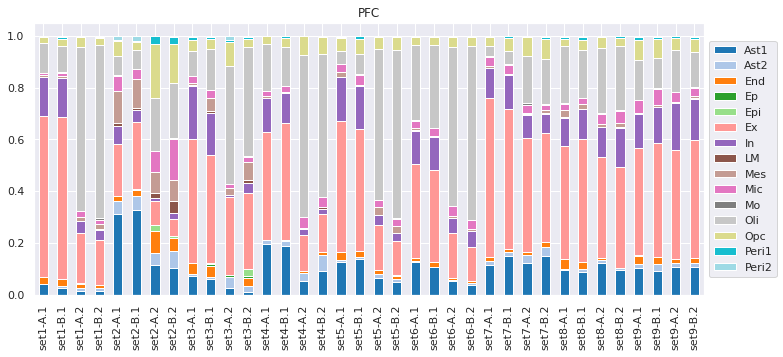

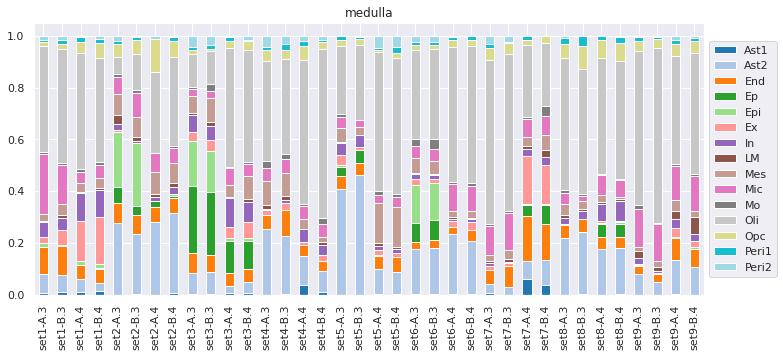

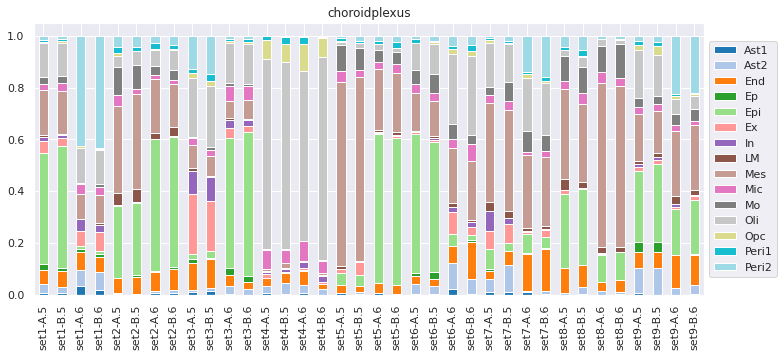

In [2]:
colors = plt.cm.tab20(np.linspace(0, 1, 10))
tissues = ['PFC', 'medulla', 'choroidplexus']

#if True:
for tissue in tissues:
    df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
    df_meta = df_meta[df_meta.tissue == tissue]
    df_meta.pid = ['-'.join(s.split('-')[-2:]) for s in df_meta.index]
    df_meta['dissection'] = ['.'.join([s, str(t)]) for s, t in zip(df_meta.pid, df_meta.tissue_id)]
    df_meta.dissection = df_meta.dissection.astype('category')
    
    tmp = df_meta.groupby(by = ['dissection', 'celltype']).count().fillna(0)
    n_cluster = len(set(df_meta.celltype))
    
    countmat = tmp.iloc[:, 0].values.reshape((-1, n_cluster))
    freq_mat = countmat / countmat.sum(axis = 1, keepdims = True)
    
    df_freq = pd.DataFrame(freq_mat)
    df_freq.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    df_freq.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]

    df_count = pd.DataFrame(countmat)
    df_count.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    df_count.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]
    
    #df_freq.index
    reindex = df_freq.index.values.copy()
    reindex[1::4] = df_freq.index.values[2::4]
    reindex[2::4] = df_freq.index.values[1::4]
    
    sns.set()
    #df_freq.loc[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), color = colors)
    df_freq.loc[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), cmap = 'tab20')
    plt.title(tissue)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)
    plt.show()

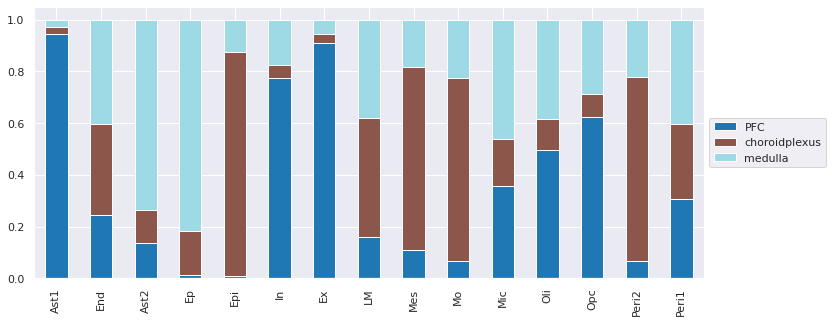

In [3]:
colors = plt.cm.tab20(np.linspace(0, 1, 10))

if True:
#for tissue in ['PFC', 'medulla', 'choroidplexus']:
    #df_cluster = pd.read_csv('./processed_data/%s/seurat_clusters_harmony50.csv' % tissue)
    df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
    df_meta.pid = ['-'.join(s.split('-')[-2:]) for s in df_meta.index]
    df_meta['dissection'] = ['.'.join([s, str(t)]) for s, t in zip(df_meta.pid, df_meta.tissue_id)]
    df_meta.dissection = df_meta.dissection.astype('category')
    
    tmp = df_meta.groupby(by = ['celltype', 'tissue']).count().fillna(0)
    n_cluster = len(set(df_meta.tissue))
    
    countmat = tmp.iloc[:, 0].values.reshape((-1, n_cluster))
    freq_mat = countmat / countmat.sum(axis = 1, keepdims = True)
    
    df_freq = pd.DataFrame(freq_mat)
    df_freq.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    df_freq.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]

    df_count = pd.DataFrame(countmat)
    df_count.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    df_count.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]
    
    
    #df_freq.index
    reindex = df_freq.index.values.copy()
    reindex[1::4] = df_freq.index.values[2::4]
    reindex[2::4] = df_freq.index.values[1::4]
    
    sns.set()
    #df_freq.loc[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), color = colors)
    df_freq.loc[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), cmap = 'tab20')
    #plt.title(tissue)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)
    plt.show()

In [4]:
df_freq.to_csv('./celltype_tissue_freq.csv')

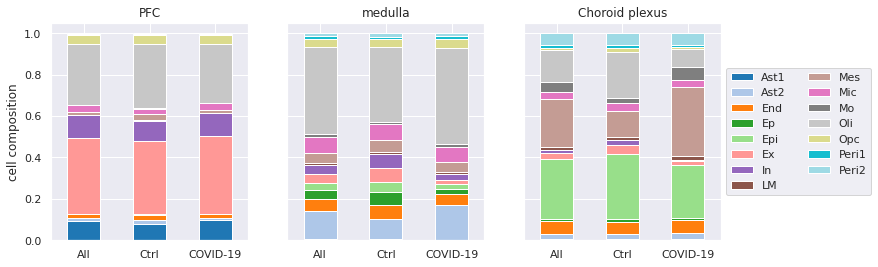

In [5]:
from collections import Counter
id2ct = sorted(set(df_meta.celltype))
tmp = Counter(df_meta.celltype)
vec = [tmp[c] for c in id2ct]

colors = plt.cm.tab20(np.linspace(0, 1, 10))
tissues = ['PFC', 'medulla', 'choroidplexus']

#if True:
fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)

for i, tissue in enumerate(tissues):
    df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
    df_meta = df_meta[df_meta.tissue == tissue]
    
    df_meta.pid = ['-'.join(s.split('-')[-2:]) for s in df_meta.index]
    df_meta['dissection'] = ['.'.join([s, str(t)]) for s, t in zip(df_meta.pid, df_meta.tissue_id)]
    df_meta.dissection = df_meta.dissection.astype('category')
    
    tmp = Counter(df_meta.celltype)
    vec0 = np.array([tmp[c] for c in id2ct])
    vec0 = vec0 / np.sum(vec0)
    
    tmp = Counter(df_meta.celltype[df_meta.is_covid == 0])
    vec1 = np.array([tmp[c] for c in id2ct])
    vec1 = vec1 / np.sum(vec1)
    
    tmp = Counter(df_meta.celltype[df_meta.is_covid == 1])
    vec2 = np.array([tmp[c] for c in id2ct])
    vec2 = vec2 / np.sum(vec2)
    
    
    df_freq = pd.DataFrame([vec0, vec1, vec2], columns = id2ct, index = ['All', 'Ctrl', 'COVID-19'])
    #df_freq.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    #df_freq.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]
    
    plt.sca(axes[i])
    #sns.set()
    #df_freq.loc[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), color = colors)
    df_freq.plot(kind='bar', stacked=True, cmap = 'tab20', legend=None, ax = axes[i])
    if tissue == 'choroidplexus':
        plt.title('Choroid plexus')
    else:
        plt.title(tissue)
    
    plt.xticks(rotation = 0)
    if i == 0:
        plt.ylabel('cell composition')
    if i == 2:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)
#    else:
        #plt.legend('off')
plt.savefig('figs/qc_cell_composition.pdf', bbox_inches='tight')
plt.show()

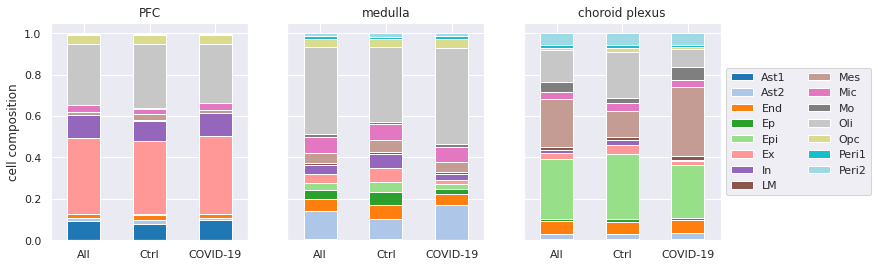

In [9]:
from collections import Counter
id2ct = sorted(set(df_meta.celltype))
tmp = Counter(df_meta.celltype)
vec = [tmp[c] for c in id2ct]

colors = plt.cm.tab20(np.linspace(0, 1, 10))
tissues = ['PFC', 'medulla', 'choroidplexus']

#if True:
fig, axes = plt.subplots(1, 3, figsize = (12, 4), sharey = True)


for i, tissue in enumerate(tissues):
    df_meta = pd.read_csv('./processed_data/clean_data/metadata.csv', index_col = 0)
    df_meta = df_meta[df_meta.tissue == tissue]
    
    df_meta.pid = ['-'.join(s.split('-')[-2:]) for s in df_meta.index]
    df_meta['dissection'] = ['.'.join([s, str(t)]) for s, t in zip(df_meta.pid, df_meta.tissue_id)]
    df_meta.dissection = df_meta.dissection.astype('category')
    
    tmp = Counter(df_meta.celltype)
    vec0 = np.array([tmp[c] for c in id2ct])
    vec0 = vec0 / np.sum(vec0)
    
    tmp = Counter(df_meta.celltype[df_meta.is_covid == 0])
    vec1 = np.array([tmp[c] for c in id2ct])
    vec1 = vec1 / np.sum(vec1)
    
    tmp = Counter(df_meta.celltype[df_meta.is_covid == 1])
    vec2 = np.array([tmp[c] for c in id2ct])
    vec2 = vec2 / np.sum(vec2)
    
    
    df_freq = pd.DataFrame([vec0, vec1, vec2], columns = id2ct, index = ['All', 'Ctrl', 'COVID-19'])
    #df_freq.columns = [i[1] for i in tmp.index.values.reshape(-1, n_cluster)[0, :]]
    #df_freq.index = [i[0] for i in tmp.index.values.reshape(-1, n_cluster)[:, 0]]
    
    plt.sca(axes[i])
    #sns.set()
    
    #df_freq[reindex].plot(kind='bar', stacked=True, figsize = (12, 5), color = colors)
    df_freq.plot(kind='bar', stacked=True, cmap = 'tab20', legend=None, ax = axes[i])
    
    if tissue == 'choroidplexus':
        plt.title('choroid plexus')
    else:
        plt.title(tissue)
    
    plt.xticks(rotation = 0)
    if i == 0:
        plt.ylabel('cell composition')
    
    if i == 2:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 2)
        

plt.savefig('figs/qc_cell_composition.pdf', bbox_inches='tight')
plt.savefig("figs/png/qc_cell_composition.png", dpi = 600, bbox_inches='tight')
plt.show()